In [62]:
import subprocess
import os
import glob
import shutil
import yaml
import argparse
import xarray as xr
import matplotlib.pyplot as plt
from functions import dateDecimal
from functions import preproc_nemo_T

In [63]:
expname='giml'
leg = '11'
startyear = 1994
endyear = 1999
yearspan = 5
yearleap = 10
legstart = str(int(leg)-yearspan)
dirs = {
        'exp': os.path.join("/ec/res4/scratch/itas/ece4", expname),
        'nemo': os.path.join("/ec/res4/scratch/itas/ece4/", expname, "output", "nemo"),
        'tmp':  os.path.join("/ec/res4/scratch/itas/martini", expname),
        'rebuild': "/ec/res4/hpcperm/itas/src/rebuild_nemo"
}

In [64]:
def get_nemo_timestep(filename):
    return os.path.basename(filename).split('_')[1]

In [65]:
flist = glob.glob(os.path.join(dirs['tmp'], legstart.zfill(3), expname + '*_restart.nc'))
tstep = get_nemo_timestep(flist[0])
oce = os.path.join(dirs['tmp'], legstart.zfill(3), expname + '_' + tstep + '_restart.nc')
xfield0 = xr.open_dataset(oce)
flist = glob.glob(os.path.join(dirs['tmp'], leg.zfill(3), expname + '*_restart.nc'))
tstep = get_nemo_timestep(flist[0])
oce = os.path.join(dirs['tmp'], leg.zfill(3), expname + '_' + tstep + '_restart.nc')
xfield1 = xr.open_dataset(oce)

In [66]:
yfield0 = {}
yfield1 = {}
#xt1 = xfield1['tn'].values
#xt0 = xfield0['tn'].values
#mask = xr.where(xfield1['tn']!=0, 1.0, 0.0)
#mask.isel(time_counter=0,nav_lev=0).plot()
#yfield['tn'] = xr.where(yfield['tn']!=0, mask.isel(time_counter=0,nav_lev=0), 0.0)
#yfield['tn'].isel(time_counter=0,nav_lev=0).plot()
#xt = ( (endyear+yearspan)*(xt1-xt0) + xt0*endyear - xt1*startyear )/(endyear-startyear)
xt = ( (endyear+yearspan)*(xfield1['tn'].values-xfield0['tn'].values) + xfield0['tn'].values*endyear - xfield1['tn'].values*startyear )/(endyear-startyear)
dx = (xfield1['tn'].values-xfield0['tn'].values)/(endyear-startyear)
yt = xr.where(xfield1['tn']!=0, xt, 0.0)
dy = xr.where(xfield1['tn']!=0, dx, 0.0)

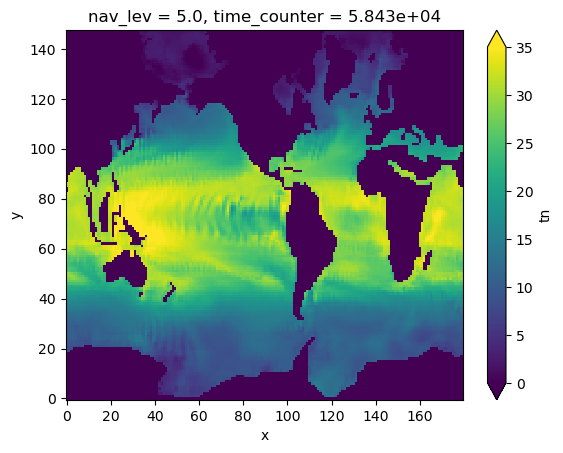

In [67]:
yt.isel(time_counter=0,nav_lev=0).plot(vmin=0,vmax=35)

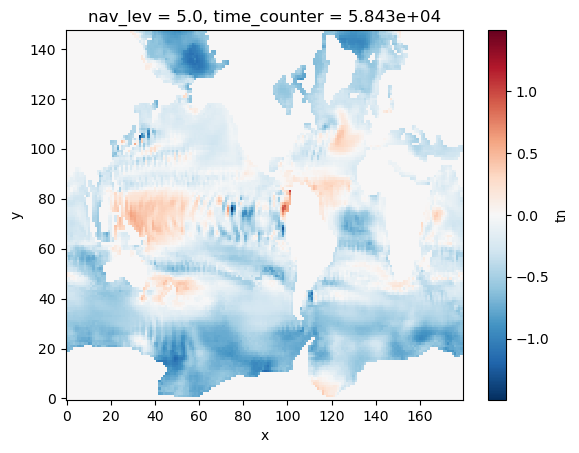

In [68]:
dy.isel(time_counter=0,nav_lev=0).plot()

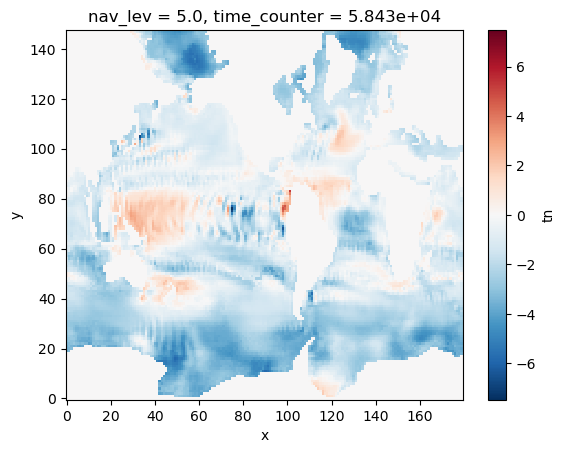

In [69]:
ddy = xr.where(xfield1['tn']!=0,yt.values-xfield1['tn'].values,0.0)
ddy.isel(time_counter=0,nav_lev=0).plot()

In [70]:
domain = xr.open_dataset(os.path.join(dirs['exp'], 'domain_cfg.nc'))
domain = domain.rename({'z': 'nav_lev'})
vol = domain['e1t']*domain['e2t']*domain['e3t_0']

In [71]:
ave = xfield1['tn'].where(xfield1['tn']!=0.0).isel(time_counter=0).weighted(vol).mean(dim=['nav_lev', 'y', 'x']).values

In [72]:
# absolute: te - tem + teq 
# relative: 
teq = 6.876635039563585
trel = (teq-ave[0])/ave[0]
delta = xr.where(xfield1['tn']!=0, xfield0['tn'].values- xfield1['tn'].values, 0.0)
zt = xr.where(delta>0, (1+trel)*xfield1['tn'], (1-trel)*xfield1['tn'])

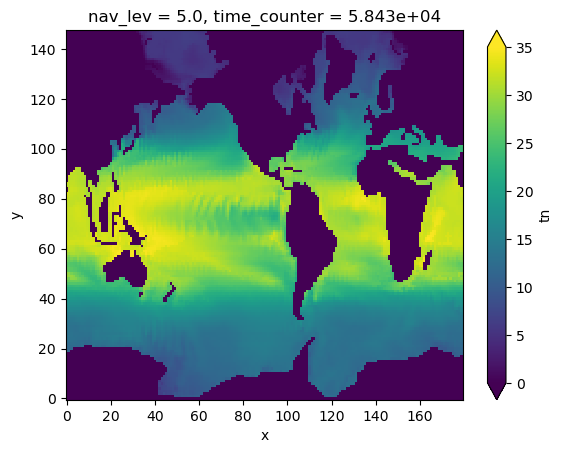

In [73]:
zt.isel(time_counter=0,nav_lev=0).plot(vmin=0, vmax=35)

In [76]:
a=xfield0['tn'].isel(time_counter=0,nav_lev=28,y=100,x=70).values
b=xfield1['tn'].isel(time_counter=0,nav_lev=28,y=100,x=70).values
c=yt.isel(time_counter=0,nav_lev=28,y=100,x=70).values
print(a,b,c)

4.000349087709789 4.000389172745513 4.000429257781252


In [78]:
a=xfield0['tn'].isel(time_counter=0,nav_lev=0,y=100,x=70).values
b=xfield1['tn'].isel(time_counter=0,nav_lev=0,y=100,x=70).values
c=zt.isel(time_counter=0,nav_lev=0,y=100,x=70).values
print(a,b,c)

22.74375850070975 21.531191638895905 21.301128660997673
